<a href="https://colab.research.google.com/github/AnyaAP/CyrusBeckLineClipping/blob/main/CyrusBeckLineClipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x1: 30
y1: 40
x2: 300
y2: 400


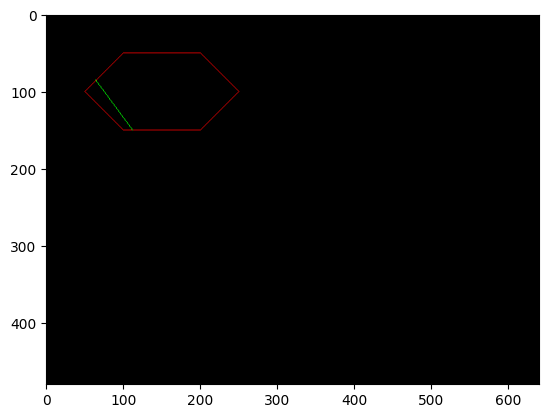

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import PIL.ImageDraw as ID, PIL.Image as Image
import numpy as np

im = Image.new("RGB", (640, 480))
im1 = Image.new("RGB", (640, 480))
draw = ID.Draw(im)
draw2 = ID.Draw(im1)
draw.polygon((200, 50, 250, 100, 200, 150, 100, 150, 50, 100, 100, 50), outline=255)
draw2.polygon((200, 50, 250, 100, 200, 150, 100, 150, 50, 100, 100, 50), outline=255)
vertices = [[200, 50], [250, 100], [200, 150], [100, 150], [50, 100], [100, 50]]
n = 6


def dot(x1, y1, x2, y2):
    return x1 * x2 + y1 * y2


def CyrusBeckLineClipping(x1, y1, x2, y2):
    normal = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

    for i in range(0, n):
        normal[i][1] = vertices[(i + 1) % n][0] - vertices[i][0]
        normal[i][0] = vertices[i][1] - vertices[(i + 1) % n][1]

    dx = x2 - x1
    dy = y2 - y1

    dp1e = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]

    for i in range(0, n):
        dp1e[i][0] = vertices[i][0] - x1
        dp1e[i][1] = vertices[i][1] - y1

    numerator = [0, 0, 0, 0, 0, 0]
    denominator = [0, 0, 0, 0, 0, 0]

    for i in range(0, n):
        numerator[i] = dot(normal[i][0], normal[i][1], dp1e[i][0], dp1e[i][1])
        denominator[i] = dot(normal[i][0], normal[i][1], dx, dy)

    t = [0, 0, 0, 0, 0, 0]
    tE = np.array([0])
    tL = np.array([1])

    for i in range(0, n):
        t[i] = float(numerator[i]) / float(denominator[i])
        if denominator[i] > 0:
            tE = np.append(tE, t[i])
        else:
            tL = np.append(tL, t[i])

    temp0 = np.amax(tE)
    temp1 = np.amin(tL)

    if temp0 > temp1:
        return

    New_X1 = float(x1) + float(dx) * float(temp0)
    New_Y1 = float(y1) + float(dy) * float(temp0)
    New_X2 = float(x1) + float(dx) * float(temp1)
    New_Y2 = float(y1) + float(dy) * float(temp1)
    draw2.line((New_X1, New_Y1, New_X2, New_Y2), fill=(0, 255, 0))


def clippingProcess(x1, y1, x2, y2):
    draw.line((x1, y1, x2, y2), fill=(0, 255, 0)) #color of the line
    CyrusBeckLineClipping(x1, y1, x2, y2)

if __name__ == '__main__':
    x1 = int(input("x1: "))
    y1 = int(input("y1: "))
    x2 = int(input("x2: "))
    y2 = int(input("y2: "))

    clippingProcess(x1, y1, x2, y2)
    plt.imshow(im)
    plt.imshow(im1)